# Основи роботи зі статистикою в R

---

## 1. Завантаження пакетів

In [5]:
# install.packages("ggplot2")

In [6]:
library(ggplot2)

## 2. Завантаження даних

In [8]:
head(msleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


In [10]:
?msleep

msleep {ggplot2},R Documentation


## 3. Базові функції

In [12]:
min(msleep$bodywt)

[1] 0.005

In [14]:
max(msleep$bodywt)

[1] 6654

In [17]:
r <- range(msleep$bodywt)

In [19]:
r[1]

[1] 0.005

In [21]:
r[2]

[1] 6654

In [23]:
mean(msleep$bodywt)

[1] 166.1363

In [25]:
median(msleep$bodywt)

[1] 1.67

In [27]:
sd(msleep$bodywt)

[1] 786.8397

In [31]:
table(msleep$vore, msleep$sleep_total)

         
          1.9 2.7 2.9 3 3.1 3.3 3.5 3.8 3.9 4 4.4 5.2 5.3 5.4 5.6 6.2 6.3 7 7.7
  carni     0   1   0 0   0   0   1   0   0 0   0   1   0   0   1   1   1 0   0
  herbi     1   0   1 1   1   1   0   1   1 1   1   0   2   0   0   0   1 0   1
  insecti   0   0   0 0   0   0   0   0   0 0   0   0   0   0   0   0   0 0   0
  omni      0   0   0 0   0   0   0   0   0 0   0   0   0   0   0   0   0 0   0
         
          8 8.3 8.4 8.6 8.7 8.9 9.1 9.4 9.5 9.6 9.7 9.8 10 10.1 10.3 10.4 10.6
  carni   0   0   0   0   1   0   0   0   0   0   0   1  0    1    0    1    0
  herbi   0   0   1   0   0   0   0   1   1   0   0   0  0    0    0    0    0
  insecti 0   0   1   1   0   0   0   0   0   0   0   0  0    0    0    0    0
  omni    1   1   0   0   1   1   2   1   0   1   1   1  1    2    1    0    0
         
          10.9 11 11.1 11.3 11.5 12.1 12.5 12.8 13 13.5 13.7 13.8 14.2 14.3
  carni      0  1    0    0    0    1    2    0  0    1    0    0    0    0
  herbi      0  0    1 

In [32]:
summary(msleep)

     name              genus               vore              order          
 Length:83          Length:83          Length:83          Length:83         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 conservation        sleep_total      sleep_rem      sleep_cycle    
 Length:83          Min.   : 1.90   Min.   :0.100   Min.   :0.1167  
 Class :character   1st Qu.: 7.85   1st Qu.:0.900   1st Qu.:0.1833  
 Mode  :character   Median :10.10   Median :1.500   Median :0.3333  
                    Mean   :10.43   Mean   :1.875   Mean   :0.4396  
                    3rd Qu.:13.75   3rd

In [34]:
more8 <- msleep[msleep$sleep_total > 8,]
head(more8)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850
Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.3833333,15.3,NA,20.490


In [37]:
cor(msleep$sleep_total, msleep$brainwt, use = "complete.obs")

[1] -0.3604874

In [39]:
table(msleep$vore)


  carni   herbi insecti    omni 
     19      32       5      20 

In [41]:
proportions(table(msleep$vore))


     carni      herbi    insecti       omni 
0.25000000 0.42105263 0.06578947 0.26315789 

In [44]:
cor(msleep$sleep_total, msleep$bodywt, use = "complete.obs")

[1] -0.3120106

In [46]:
cor(msleep$brainwt, msleep$bodywt, use = "complete.obs")

[1] 0.9337822

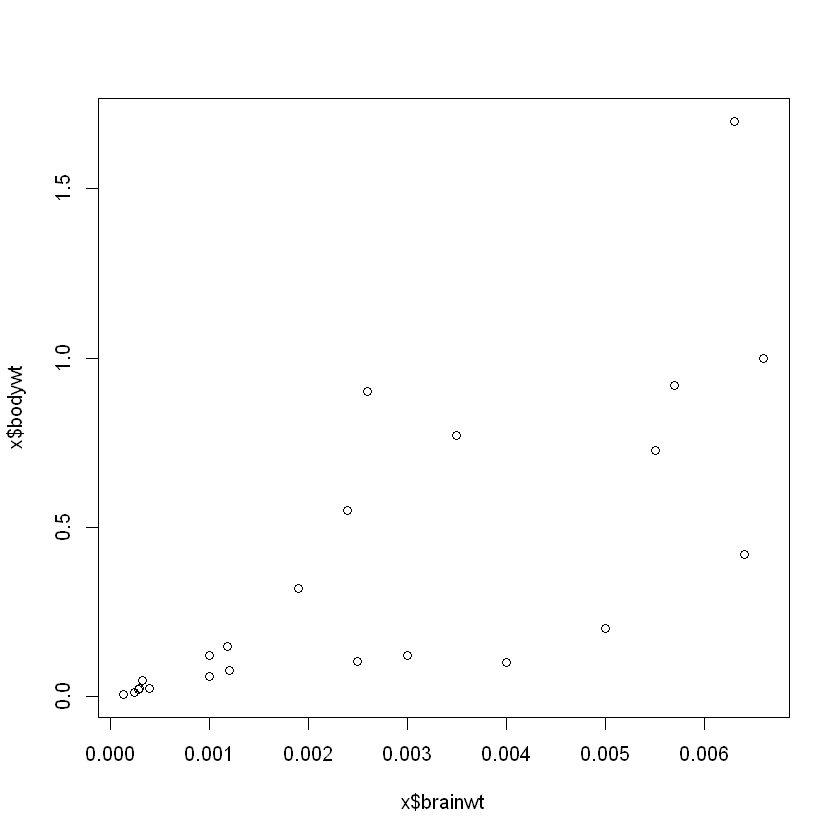

In [51]:
x <- msleep[msleep$brainwt < 0.01,]
plot(x$brainwt, x$bodywt)

In [55]:
# install.packages("psych")

In [57]:
library(psych)

In [59]:
describe(msleep)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
name*,1,83,42.0000000,24.1039416,42.0000000,42.00000000,31.13460000,1.0000000,83.000,82.000000,0.00000000,-1.2434523,2.64575131
genus*,2,83,40.2530120,22.5176589,41.0000000,40.44776119,28.16940000,1.0000000,77.000,76.000000,-0.05639775,-1.2520857,2.47163416
vore*,3,76,2.3421053,1.1260862,2.0000000,2.30645161,1.48260000,1.0000000,4.000,3.000000,0.41786835,-1.2479239,0.12917095
order*,4,83,11.2771084,6.1511713,15.0000000,11.53731343,4.44780000,1.0000000,19.000,18.000000,-0.37717341,-1.5460760,0.67517877
conservation*,5,54,3.7777778,1.3127340,4.0000000,3.77272727,0.74130000,1.0000000,6.000,5.000000,-0.13522194,-0.5048689,0.17864046
sleep_total,6,83,10.4337349,4.4503570,10.1000000,10.38358209,5.04084000,1.9000000,19.900,18.000000,0.05230964,-0.7074466,0.48849014
sleep_rem,7,61,1.8754098,1.2982881,1.5000000,1.70816327,1.18608000,0.1000000,6.600,6.500000,1.46161590,2.7342493,0.16622875
sleep_cycle,8,32,0.4395833,0.3586801,0.3333333,0.37628205,0.23474500,0.1166667,1.500,1.383333,1.49498905,1.5749153,0.06340629
awake,9,83,13.5674699,4.4520852,13.9000000,13.61716418,5.04084000,4.1000000,22.100,18.000000,-0.05133450,-0.7073810,0.48867984


In [62]:
describe(msleep ~ vore)


 Descriptive statistics by group 
vore: carni
             vars  n  mean     sd median trimmed   mad  min    max  range  skew
name            1 19 39.58  24.28  42.00   39.41 31.13 4.00  78.00  74.00  0.08
genus           2 19 41.11  23.05  45.00   41.35 20.76 1.00  77.00  76.00 -0.04
vore            3 19  1.00   0.00   1.00    1.00  0.00 1.00   1.00   0.00   NaN
order           4 19  4.89   4.08   3.00    4.29  0.00 3.00  17.00  14.00  2.12
conservation    5 14  4.07   1.64   4.00    4.17  2.22 1.00   6.00   5.00 -0.30
sleep_total     6 19 10.38   4.67  10.40   10.30  6.08 2.70  19.40  16.70  0.10
sleep_rem       7 10  2.29   1.86   1.95    2.02  1.56 0.10   6.60   6.50  0.96
sleep_cycle     8  5  0.37   0.03   0.38    0.37  0.05 0.33   0.42   0.08  0.04
awake           9 19 13.63   4.68  13.60   13.70  6.08 4.60  21.35  16.75 -0.10
brainwt        10  9  0.08   0.10   0.04    0.08  0.04 0.01   0.32   0.31  1.46
bodywt         11 19 90.75 182.07  20.49   54.37 30.34 0.03 800.00 799.97

## 4. Кореляційний аналіз

In [64]:
head(msleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


In [67]:
data <- msleep[, c(6:11)]
head(data)

sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.1,NA,NA,11.9,NA,50.000
17.0,1.8,NA,7.0,0.01550,0.480
14.4,2.4,NA,9.6,NA,1.350
14.9,2.3,0.1333333,9.1,0.00029,0.019
4.0,0.7,0.6666667,20.0,0.42300,600.000
14.4,2.2,0.7666667,9.6,NA,3.850


In [69]:
data <- na.omit(data)

In [72]:
cor_matrix <- cor(data)
cor_matrix

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
sleep_total,1.0000000,0.6618840,-0.5159194,-1.0000000,-0.4597432,-0.6035842
sleep_rem,0.6618840,1.0000000,-0.3522936,-0.6618840,-0.2820403,-0.4089389
sleep_cycle,-0.5159194,-0.3522936,1.0000000,0.5159194,0.8516203,0.4343020
awake,-1.0000000,-0.6618840,0.5159194,1.0000000,0.4597432,0.6035842
brainwt,-0.4597432,-0.2820403,0.8516203,0.4597432,1.0000000,0.4830048
bodywt,-0.6035842,-0.4089389,0.4343020,0.6035842,0.4830048,1.0000000


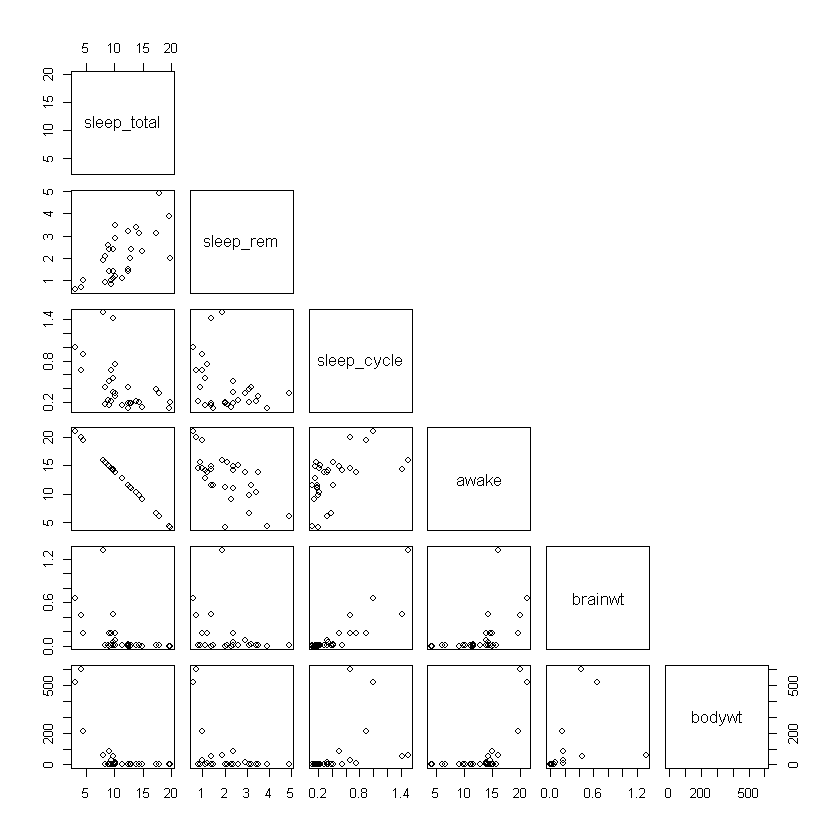

In [77]:
pairs(data, upper.panel = NULL)

In [79]:
install.packages("reshape2")

package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpI5yt5x\downloaded_packages


In [80]:
library(reshape2)

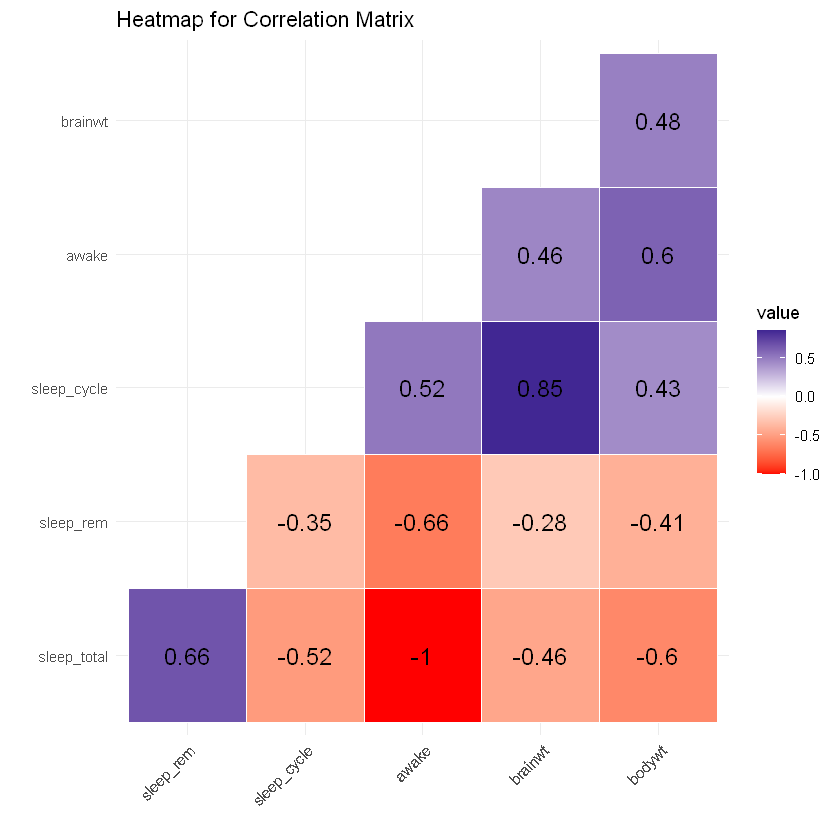

In [82]:
ggplot(subset(melt(cor_matrix), lower.tri(cor_matrix)), 
       aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "red", mid = "white", high = "navy", midpoint = 0) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Heatmap for Correlation Matrix", x = "", y = "") +
          geom_text(aes(label = round(value, 2)), color = "black", size = 5)